In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import math as math
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore
#from google.colab import drive
#drive.mount('/content/drive/')
#!pip install statistics
#!pip install missingno

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importar datos

In [ ]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

Saving Data_Nutricion_grupos ..xlsx to Data_Nutricion_grupos ..xlsx


{'Data_Nutricion_grupos ..xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x06w\\T\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x

In [ ]:
path = 'Data_Nutricion_grupos ..xlsx'
df = pd.read_excel(path)
df.head(20)

Individuo  talla  edad  peso_kg  circun_cuello        IMC  \
0    Persona 1  155.7  16.0     71.2           35.7  29.576170   
1    Persona 2  166.5  16.0     61.0           31.8  22.364707   
2    Persona 3  151.3  16.0     49.1           30.5  21.623567   
3    Persona 4  151.7  16.0     54.6           32.6  23.117479   
4    Persona 5  160.3  16.0     58.0           30.1  22.260196   
5    Persona 6  162.4  16.0     70.8           33.9  26.124451   
6    Persona 7  167.0  16.0     47.4           30.5  17.318656   
7    Persona 8  158.7  16.0     49.3           31.2  18.979031   
8    Persona 9  158.2  16.0     91.0           37.5  35.521296   
9   Persona 10  171.0  16.0     50.4           30.8  17.543860   
10  Persona 11  135.6  15.0     34.3           30.9  18.436578   
11  Persona 12  158.9  16.0      NaN           31.5  20.040231   
12  Persona 13  162.1  16.0      NaN           31.5  19.827671   
13  Persona 14  166.7  16.0      NaN           30.8  18.712514   
14  Persona 15  158.2  16.0      NaN           30.5  22.295707   
15  Persona 16  160.3  16.0     74.3           34.7  28.408991   
16  Persona 17  169.3  16.0     52.1           31.3  18.770177   
17  Persona 18    NaN  15.0     44.5           31.2  18.516703   
18  Persona 19    NaN  17.0     58.6           33.9  23.396507   
19  Persona 20    NaN  16.0     84.5           37.0  36.708603   

    circun_cintura  cadera  ind_cintura_cadera  ind_cintura_estatura  \
0             90.0    98.0            0.918367              0.578035   
1             80.9   100.5            0.804975              0.485886   
2             72.0    86.0            0.837209              0.475876   
3              NaN    88.4            0.841629              0.490442   
4              NaN    97.9            0.813075                   NaN   
5             86.5   106.1            0.815269              0.532635   
6             66.7    81.5                 NaN              0.399401   
7             69.3    83.2            0.832933              0.436673   
8            107.5   116.0            0.926724              0.679520   
9             66.0    80.0            0.825000              0.385965   
10            64.0    72.5            0.882759              0.471976   
11            72.0    84.5            0.852071              0.453115   
12            66.7    79.5            0.838994              0.411474   
13            75.4    81.6                 NaN              0.452310   
14            78.0    90.0            0.866667              0.493047   
15            94.0   107.5            0.874419              0.586400   
16            68.0    82.0            0.829268              0.401654   
17            69.0    85.1                 NaN              0.455446   
18            73.0    86.0            0.848837              0.459698   
19           107.0   119.0            0.899160              0.704411   

    por_grasa_corporal  masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
0            36.446202               45.250304                    13.0   
1            28.790714               43.437664                     5.0   
2            29.867419               34.435097                    13.0   
3            27.867640               39.384269                     5.0   
4            30.276688               40.439521                    10.0   
5            31.439726               48.540674                    11.0   
6             9.690057               42.806913                     3.5   
7                  NaN               41.235083                     5.5   
8            34.760913               59.367569                    25.0   
9            12.045941               44.328846                     3.0   
10                 NaN               31.650784                     3.0   
11           10.198533               45.529344                     3.5   
12           10.923991               46.230449                     4.0   
13           10.923991               46.319525                     3.

In [ ]:
df.shape

(652, 17)

In [ ]:
df[df['Individuo'].duplicated()].head()


Empty DataFrame
Columns: [Individuo, talla, edad, peso_kg, circun_cuello, IMC, circun_cintura, cadera, ind_cintura_cadera, ind_cintura_estatura, por_grasa_corporal, masa_corporal_magra_kg, pliegue_cutaneo_BICEPS, pliegue_cutaneo_TRICEPS, pliegue_cutaneo_ESCAPULAR, pliegue_cutaneo_SUPRAILIACO, Grupos]
Index: []

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
df.describe()

talla        edad     peso_kg  circun_cuello         IMC  \
count  624.000000  645.000000  629.000000     623.000000  640.000000   
mean   158.821474   14.753488   56.943561      32.138042   22.426463   
std      7.477915    1.054276    8.592938       2.156724    3.046897   
min    135.600000    0.000000   33.900000      24.500000   14.537886   
25%    153.700000   14.000000   51.000000      30.700000   20.274879   
50%    158.200000   15.000000   55.800000      32.000000   22.174447   
75%    163.700000   15.000000   61.700000      33.500000   23.914351   
max    188.600000   17.000000   91.100000      39.200000   36.708603   

       circun_cintura      cadera  ind_cintura_cadera  ind_cintura_estatura  \
count      637.000000  647.000000          639.000000            636.000000   
mean        74.517425   89.868470            0.831048              0.470617   
std          6.915982    7.210739            0.054721              0.046455   
min         55.000000   69.800000            0.654018              0.362319   
25%         70.000000   85.000000            0.794296              0.438694   
50%         73.600000   89.000000            0.827897              0.464779   
75%         78.000000   94.000000            0.866831              0.494481   
max        107.500000  120.800000            1.026528              0.704411   

       por_grasa_corporal  masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
count          650.000000              648.000000              652.000000   
mean            23.538992               43.379476                9.181748   
std              7.860764                6.928913                5.661837   
min              4.214310               28.498090                2.000000   
25%             15.971877               38.154599                5.000000   
50%             26.094372               42.357287                8.000000   
75%             30.073493               48.120857               12.000000   
max             39.445282               71.568947               90.000000   

       pliegue_cutaneo_TRICEPS  pliegue_cutaneo_ESCAPULAR  \
count               652.000000                 652.000000   
mean                 15.647239                  14.383436   
std                   5.692567                   5.307465   
min                   5.000000                   5.000000   
25%                  11.000000                  10.000000   
50%                  16.000000                  14.000000   
75%                  19.000000                  18.000000   
max                  39.000000                  35.000000   

       pliegue_cutaneo_SUPRAILIACO  
count                   652.000000  
mean                     14.679448  
std                       5.953868  
min                       3.000000  
25%                      10.000000  
50%                      15.000000  
75%                      19.000000  
max                      35.000000

In [ ]:
df.dtypes

Individuo                       object
talla                          float64
edad                           float64
peso_kg                        float64
circun_cuello                  float64
IMC                            float64
circun_cintura                 float64
cadera                         float64
ind_cintura_cadera             float64
ind_cintura_estatura           float64
por_grasa_corporal             float64
masa_corporal_magra_kg         float64
pliegue_cutaneo_BICEPS         float64
pliegue_cutaneo_TRICEPS        float64
pliegue_cutaneo_ESCAPULAR      float64
pliegue_cutaneo_SUPRAILIACO    float64
Grupos                          object
dtype: object

In [ ]:
df.isna().sum() #Identificar nan

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

# Dividir data cuantitativa y cualitativa

In [ ]:
numerical_features = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

categorical_features = df.loc[:, ['Grupos']]

In [ ]:
numerical_features = numerical_features.astype('float64')
numerical_features.dtypes

talla                          float64
edad                           float64
peso_kg                        float64
circun_cuello                  float64
IMC                            float64
circun_cintura                 float64
cadera                         float64
ind_cintura_cadera             float64
ind_cintura_estatura           float64
por_grasa_corporal             float64
masa_corporal_magra_kg         float64
pliegue_cutaneo_BICEPS         float64
pliegue_cutaneo_TRICEPS        float64
pliegue_cutaneo_ESCAPULAR      float64
pliegue_cutaneo_SUPRAILIACO    float64
dtype: object

In [ ]:
categorical_features = categorical_features.astype(str)
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Grupos  652 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


# Análisis Univariado

### Variables Cuantitativas

In [ ]:
def desc_num_feature(numerical_features): #Función para visualizar el histograma por cada variable numérica
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  df[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  #df[feature_name].describe().round(2)

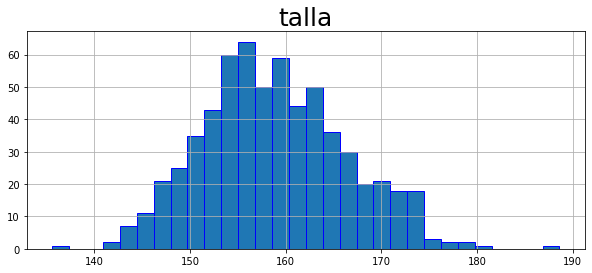

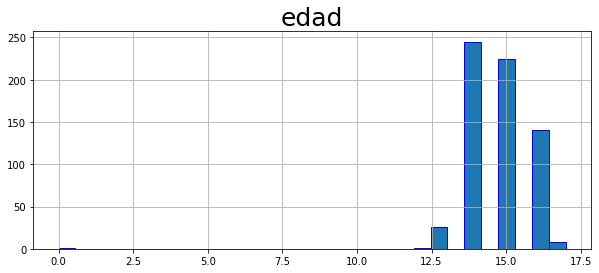

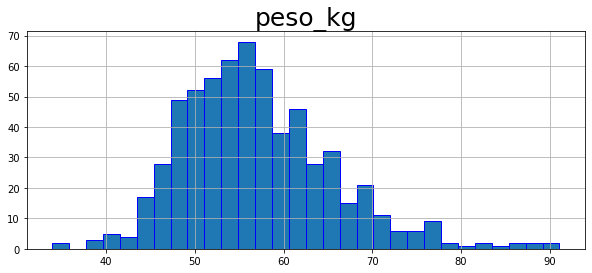

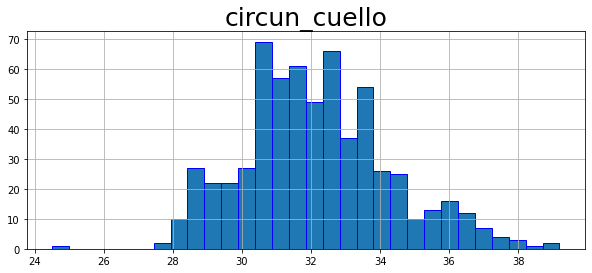

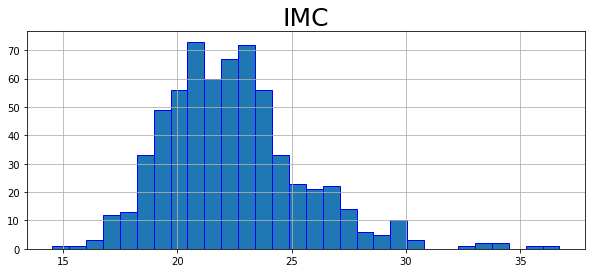

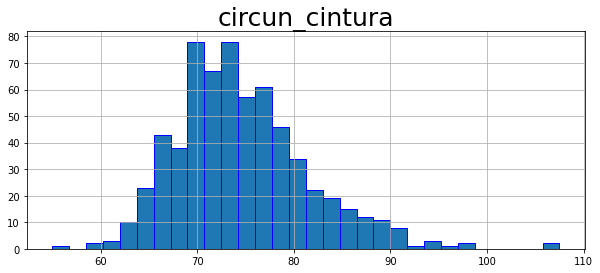

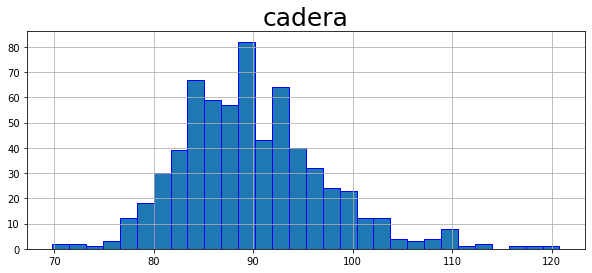

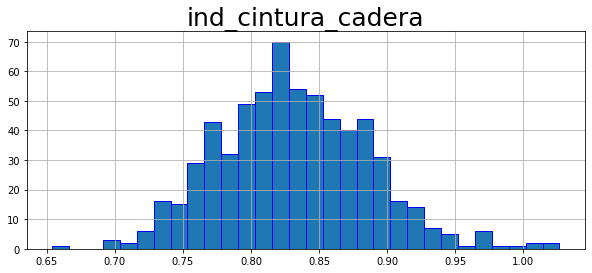

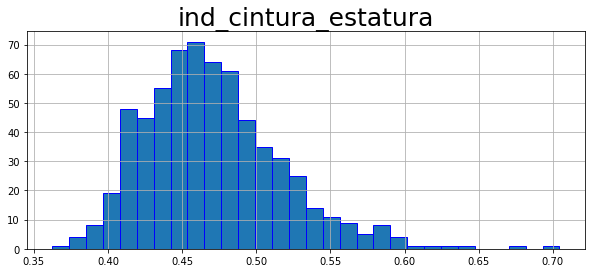

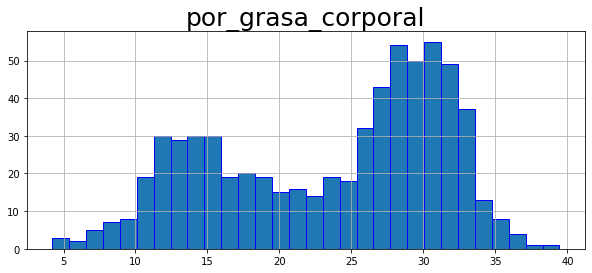

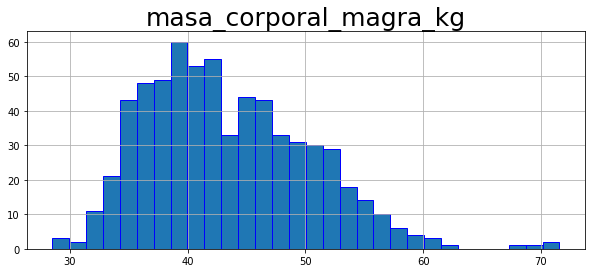

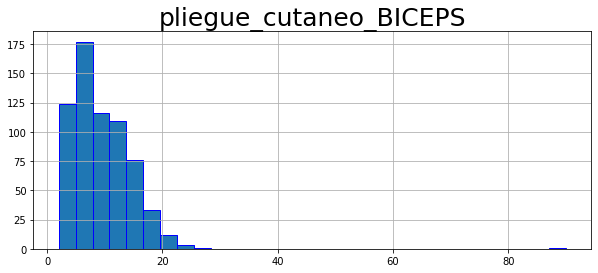

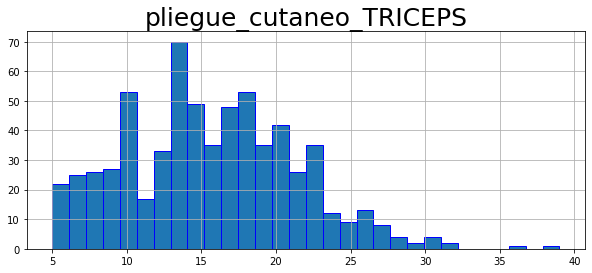

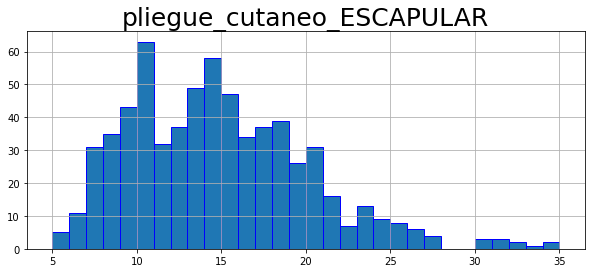

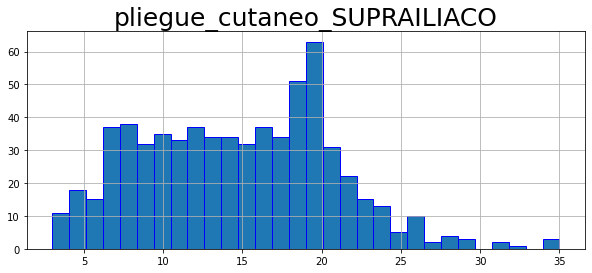

In [ ]:
for x in numerical_features:
  desc_num_feature(x)

In [ ]:
df['edad'].value_counts()

14.0    245
15.0    224
16.0    140
13.0     26
17.0      8
0.0       1
12.0      1
Name: edad, dtype: int64

### Variables Cualitativas

In [ ]:
def desc_cat_feature(categorical_features): #Función para visualizar el diagrama de barras por cada variable categorica
  fig, ax = plt.subplots(figsize=(10, 6))
  # count = sns.countplot(df[categorical_features], order=df[categorical_features].value_counts().index)
  count = df[categorical_features].value_counts()
  percent = 100*df[categorical_features].value_counts(normalize=True)  
  count_percent = pd.DataFrame({'count':count, 'percent':percent.round(1)})
  print(count_percent)
  print(count.plot(kind='bar', title=categorical_features, ))
  ax.set_title(categorical_features, size=25)
  plt.show()

   count  percent
A    337     51.7
B    315     48.3
AxesSubplot(0.125,0.125;0.775x0.755)


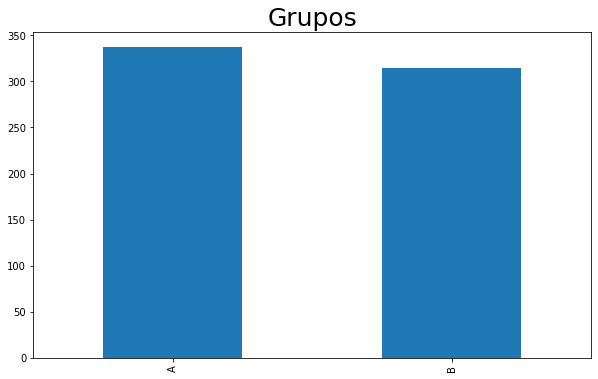

In [ ]:
for x in categorical_features:
  desc_cat_feature(x)

# Análisis Bivariado

### Variables numéricas

#### Gráficos de Dispersión

In [ ]:
# En caso tengamos demasiadas variables, debemos seleccionar las más importantes:
# numerical_features_selected = df.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3', 
#                                 'Siniestros4', 'Siniestros5', 'Siniestros6']]

In [ ]:
# Si solo se desea realizar el gráfico de dispersión entre 2 variables determinadas
# sns.jointplot(x='', y='', data=df, size=5)

<Figure size 432x288 with 0 Axes>

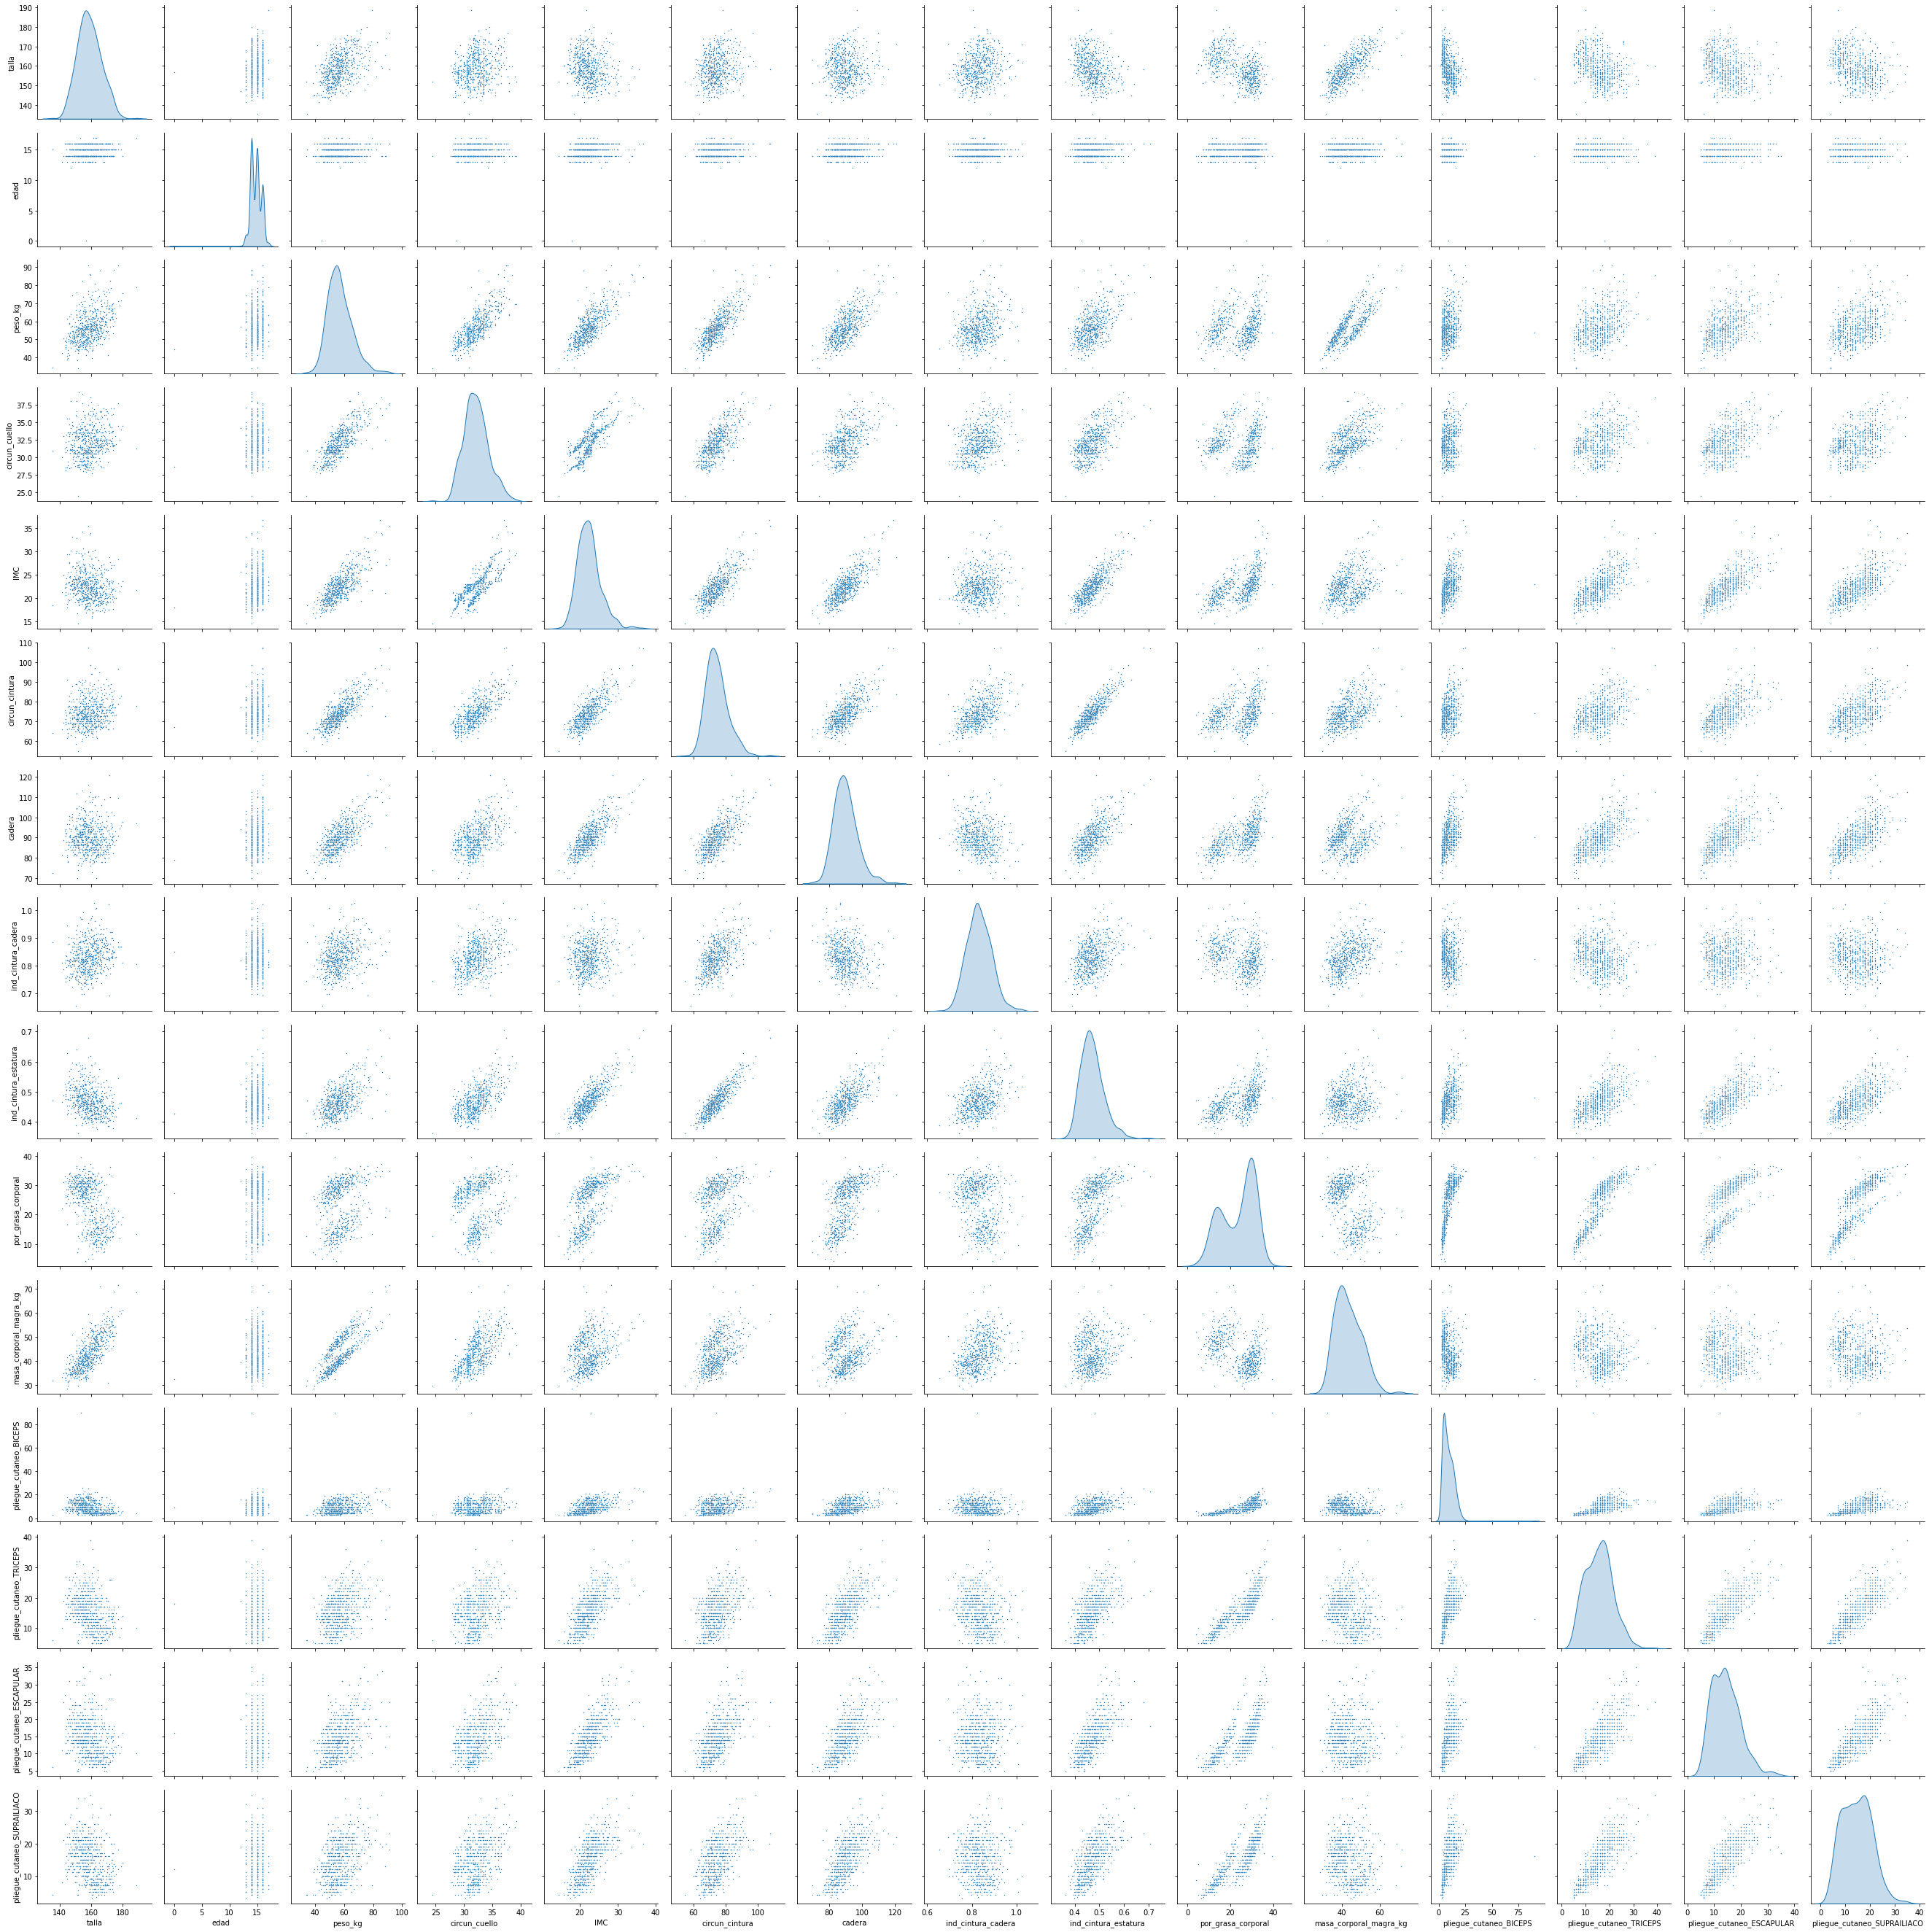

In [ ]:
plt.figure(figsize=(6,4))

sns.pairplot(numerical_features, plot_kws={'s': 2}, diag_kind='kde');

#### Correlación

In [ ]:
# Correlación de Pearson (no se ha hecho prueba de normalidad aún, es un Análisis preliminar) 
numerical_features.corr(method='pearson')

talla      edad   peso_kg  circun_cuello  \
talla                        1.000000  0.091713  0.472932       0.190554   
edad                         0.091713  1.000000  0.148708       0.099741   
peso_kg                      0.472932  0.148708  1.000000       0.775158   
circun_cuello                0.190554  0.099741  0.775158       1.000000   
IMC                         -0.154091  0.148073  0.760661       0.776230   
circun_cintura               0.172372  0.159040  0.801183       0.725211   
cadera                       0.024611  0.174893  0.704615       0.507537   
ind_cintura_cadera           0.210355  0.013972  0.284333       0.407630   
ind_cintura_estatura        -0.325421  0.114630  0.557130       0.611995   
por_grasa_corporal          -0.520549  0.051095  0.209101       0.113986   
masa_corporal_magra_kg       0.762027  0.109498  0.782731       0.635971   
pliegue_cutaneo_BICEPS      -0.312593 -0.027936  0.207682       0.135223   
pliegue_cutaneo_TRICEPS     -0.367162  0.026583  0.356112       0.297800   
pliegue_cutaneo_ESCAPULAR   -0.263317  0.065489  0.488547       0.475543   
pliegue_cutaneo_SUPRAILIACO -0.312588  0.065205  0.418612       0.375785   

                                  IMC  circun_cintura    cadera  \
talla                       -0.154091        0.172372  0.024611   
edad                         0.148073        0.159040  0.174893   
peso_kg                      0.760661        0.801183  0.704615   
circun_cuello                0.776230        0.725211  0.507537   
IMC                          1.000000        0.787626  0.789677   
circun_cintura               0.787626        1.000000  0.716219   
cadera                       0.789677        0.716219  1.000000   
ind_cintura_cadera           0.162232        0.538167 -0.205826   
ind_cintura_estatura         0.835331        0.881877  0.683521   
por_grasa_corporal           0.598278        0.352259  0.625507   
masa_corporal_magra_kg       0.310728        0.495450  0.240553   
pliegue_cutaneo_BICEPS       0.452581        0.284809  0.406143   
pliegue_cutaneo_TRICEPS      0.668955        0.445329  0.680649   
pliegue_cutaneo_ESCAPULAR    0.748439        0.604771  0.656597   
pliegue_cutaneo_SUPRAILIACO  0.687182        0.530200  0.661073   

                             ind_cintura_cadera  ind_cintura_estatura  \
talla                                  0.210355             -0.325421   
edad                                   0.013972              0.114630   
peso_kg                                0.284333              0.557130   
circun_cuello                          0.407630              0.611995   
IMC                                    0.162232              0.835331   
circun_cintura                         0.538167              0.881877   
cadera                                -0.205826              0.683521   
ind_cintura_cadera                     1.000000              0.416645   
ind_cintura_estatura                   0.416645              1.000000   
por_grasa_corporal                    -0.258998              0.580117   
masa_corporal_magra_kg                 0.413987              0.128427   
pliegue_cutaneo_BICEPS                -0.092049              0.421566   
pliegue_cutaneo_TRICEPS               -0.192586              0.600862   
pliegue_cutaneo_ESCAPULAR              0.068949              0.707414   
pliegue_cutaneo_SUPRAILIACO           -0.049073              0.656912   

                             por_grasa_corporal  masa_corporal_magra_kg  \
talla                                 -0.520549                0.762027   
edad                                   0.051095                0.109498   
peso_kg                                0.209101                0.782731   
circun_cuello                          0.113986                0.635971   
IMC                                    0.598278                0.310728   
circun_cintura                         0.352259                0.495450   
cadera                                 0.625507 

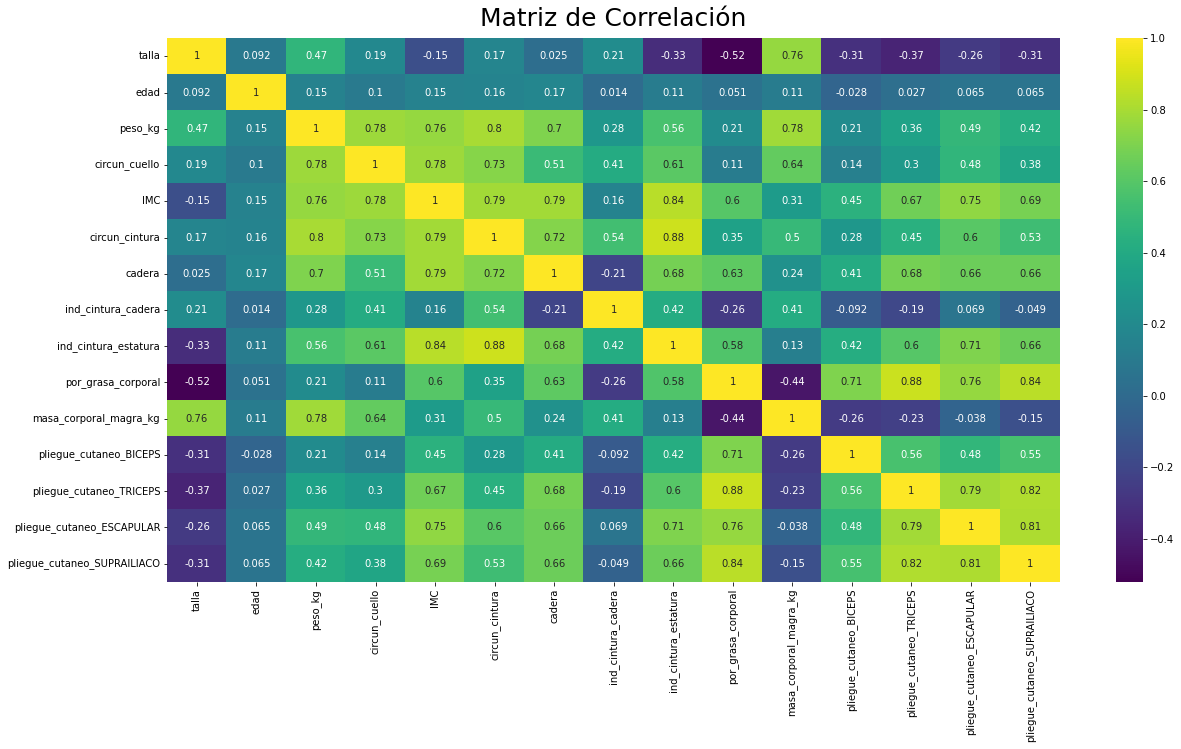

In [ ]:
# Correlación de Pearson -  Mapa de calor
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(numerical_features.corr(method='pearson'),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

### Variables categóricas

#### Chi - Cuadrado


2 variables son cualitativas (ordinales y/o nominales)

Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5% (0.05)

In [ ]:
contingencia = pd.crosstab(df['Grupos'], df['edad'])
contingencia

edad    0.0   12.0  13.0  14.0  15.0  16.0  17.0
Grupos                                          
A          0     0     0    29   155   139     8
B          1     1    26   216    69     1     0

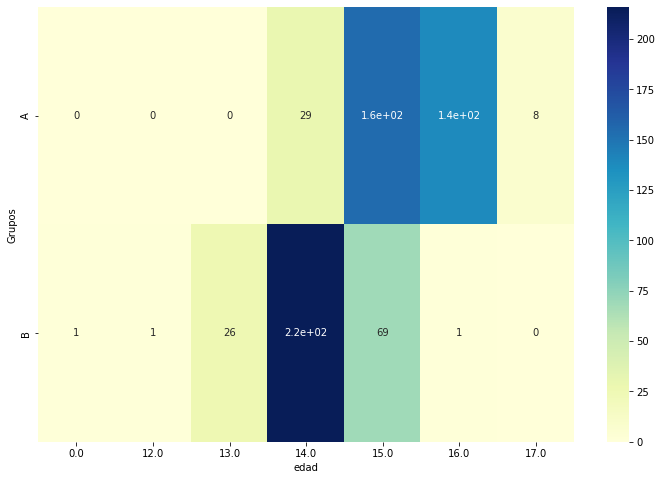

In [ ]:
# Mapa de calor
plt.figure(figsize=(12,8)) 
sns.heatmap(contingencia, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)

p-value = 0.000


## Variable categórica con numérica

#### Prueba de ANOVA

Ho: Mu1 = Mu2  = Mun; No existen diferencias entre las medias de los "n" grupos.

Ha: Mu1 <> Mun; Existen diferencias entre al menos dos medias.

"Prueba de ANOVA" Utilizamos cuando los "n" grupos o muestras, en la variable de investigación tienen distribuciones normales.

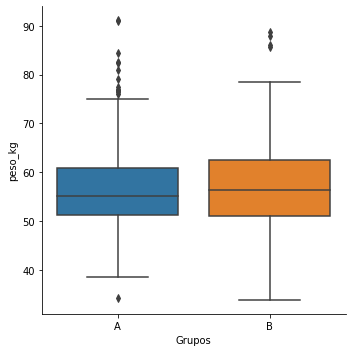

In [ ]:
# Graficamos 

sns.catplot(x = 'Grupos', y = 'peso_kg', data = df, kind = "box"); # x: cualitativa - y: cuantitativa

In [ ]:
# Tabla de frecuencia de la variable de agrupamiento
nivel_ingresos_count = (df
                       .groupby('Grupos') # variable cualitativa
                       .agg(frequency=('peso_kg', 'count'))) # variable cuantitativa

nivel_ingresos_count["Acumulado"] = nivel_ingresos_count["frequency"].cumsum()
nivel_ingresos_count

frequency  Acumulado
Grupos                      
A             321        321
B             308        629

In [ ]:
# # Realizando la prueba ANOVA para "n" muestras independientes

# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# mod = ols('Grupos ~ peso_kg', data=df).fit()
# anova = sm.stats.anova_lm(mod, typ=2)

# print(anova)

# Análisis Multivariante

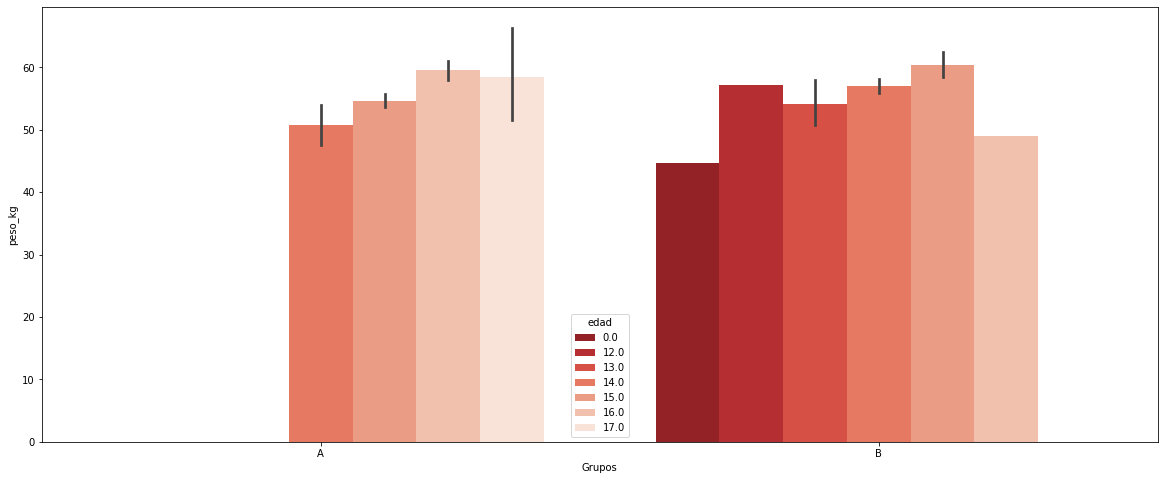

In [ ]:
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.barplot(x = 'Grupos', y = 'peso_kg',   # x: cualitativa - y: cuantitativa
                 hue='edad', data=df, palette='Reds_r') # hue: colores - cualitativa

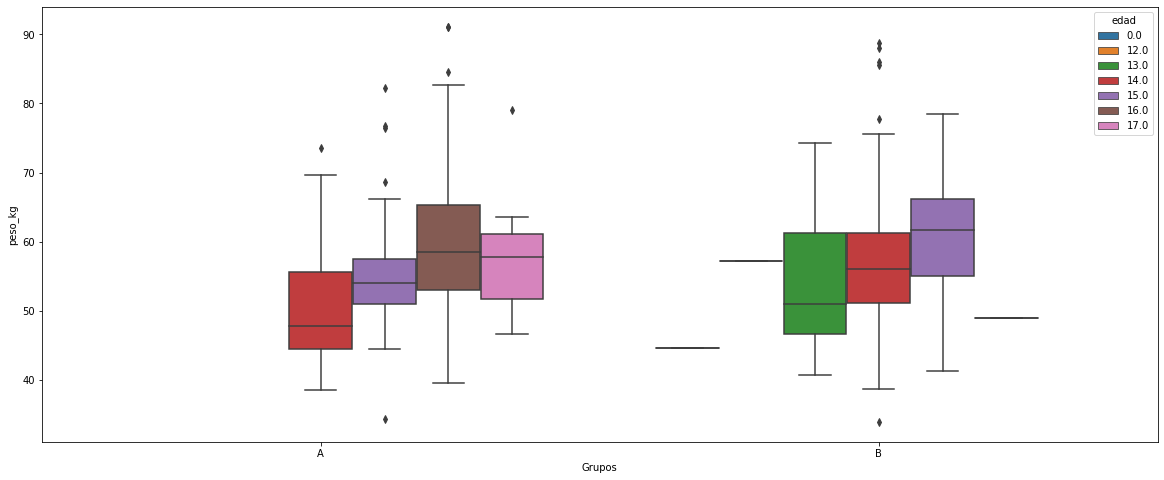

In [ ]:
f, ax = plt.subplots(1,1, figsize=(20,8))
sns.boxplot(x = "Grupos", y = "peso_kg", hue = "edad", data = df);

# Medidas de Dispersión

### Cuartiles

In [ ]:
#Obtenemos los Quartiles
def quartil(numerical_features):
  for i in numerical_features:
    print('-------------------------------')
    print('Variable: ' , i)
    print('-------------------------------')
    Q1 = df[i].quantile([.25])
    Q2 = df[i].quantile([.50])
    Q3 = df[i].quantile([.75])
    print("Mínimo es:    ", min(df[i]))
    print('Quartil 1 es: ', Q1)
    print('Quartil 2 es: ', Q2)
    print('Quartil 3 es: ', Q3)
    print("Máximo es:    ", max(df[i]))

In [ ]:
quartil(numerical_features)

-------------------------------
Variable:  talla
-------------------------------
Mínimo es:     135.6
Quartil 1 es:  0.25    153.7
Name: talla, dtype: float64
Quartil 2 es:  0.5    158.2
Name: talla, dtype: float64
Quartil 3 es:  0.75    163.7
Name: talla, dtype: float64
Máximo es:     188.6
-------------------------------
Variable:  edad
-------------------------------
Mínimo es:     0.0
Quartil 1 es:  0.25    14.0
Name: edad, dtype: float64
Quartil 2 es:  0.5    15.0
Name: edad, dtype: float64
Quartil 3 es:  0.75    15.0
Name: edad, dtype: float64
Máximo es:     17.0
-------------------------------
Variable:  peso_kg
-------------------------------
Mínimo es:     33.9
Quartil 1 es:  0.25    51.0
Name: peso_kg, dtype: float64
Quartil 2 es:  0.5    55.8
Name: peso_kg, dtype: float64
Quartil 3 es:  0.75    61.7
Name: peso_kg, dtype: float64
Máximo es:     91.1
-------------------------------
Variable:  circun_cuello
-------------------------------
Mínimo es:     24.5
Quartil 1 es:  0.25

### RIC

In [ ]:
# Obtenemos el Rango Intercuartil
def r_quartil(numerical_features):
  for i in numerical_features:
    print('-------------------------------')
    print('Variable: ' , i)
    print('-------------------------------')
    Q1 = df[i].quantile([.25])
    Q3 = df[i].quantile([.75])
    Q = {**Q1, **Q3}
    dfx = pd.DataFrame([[key, Q[key]] for key in Q.keys()], columns=['Q', 'Valor'])
    r_intercuartil = dfx.iloc[1, 1]  - dfx.iloc[0, 1]
    print(dfx)
    print('Rango intercuartil:', round(r_intercuartil, 2))

In [ ]:
r_quartil(numerical_features)

-------------------------------
Variable:  talla
-------------------------------
      Q  Valor
0  0.25  153.7
1  0.75  163.7
Rango intercuartil: 10.0
-------------------------------
Variable:  edad
-------------------------------
      Q  Valor
0  0.25   14.0
1  0.75   15.0
Rango intercuartil: 1.0
-------------------------------
Variable:  peso_kg
-------------------------------
      Q  Valor
0  0.25   51.0
1  0.75   61.7
Rango intercuartil: 10.7
-------------------------------
Variable:  circun_cuello
-------------------------------
      Q  Valor
0  0.25   30.7
1  0.75   33.5
Rango intercuartil: 2.8
-------------------------------
Variable:  IMC
-------------------------------
      Q      Valor
0  0.25  20.274879
1  0.75  23.914351
Rango intercuartil: 3.64
-------------------------------
Variable:  circun_cintura
-------------------------------
      Q  Valor
0  0.25   70.0
1  0.75   78.0
Rango intercuartil: 8.0
-------------------------------
Variable:  cadera
-------------------

### Varianza

In [ ]:
def varianza(numerical_features):
  for i in numerical_features:
    print('-------------------------------')
    print('Variable: ' , i)
    varianza = np.var(df[i])
    varianza = round(varianza, 2)
    print('La varianza es: ', varianza)

In [ ]:
varianza(numerical_features)

-------------------------------
Variable:  talla
La varianza es:  55.83
-------------------------------
Variable:  edad
La varianza es:  1.11
-------------------------------
Variable:  peso_kg
La varianza es:  73.72
-------------------------------
Variable:  circun_cuello
La varianza es:  4.64
-------------------------------
Variable:  IMC
La varianza es:  9.27
-------------------------------
Variable:  circun_cintura
La varianza es:  47.76
-------------------------------
Variable:  cadera
La varianza es:  51.91
-------------------------------
Variable:  ind_cintura_cadera
La varianza es:  0.0
-------------------------------
Variable:  ind_cintura_estatura
La varianza es:  0.0
-------------------------------
Variable:  por_grasa_corporal
La varianza es:  61.7
-------------------------------
Variable:  masa_corporal_magra_kg
La varianza es:  47.94
-------------------------------
Variable:  pliegue_cutaneo_BICEPS
La varianza es:  32.01
-------------------------------
Variable:  pliegue_c

### Desviación estándar

In [ ]:
def desv_estandar(numerical_features):
  for i in numerical_features:
    desv_estandar = round(stats.stdev(df[i]), 2)
    print('-------------------------------')
    print('Variable: ' , i)
    print('La desvación estándar es: ', desv_estandar)

In [ ]:
desv_estandar(numerical_features)

-------------------------------
Variable:  talla
La desvación estándar es:  nan
-------------------------------
Variable:  edad
La desvación estándar es:  nan
-------------------------------
Variable:  peso_kg
La desvación estándar es:  nan
-------------------------------
Variable:  circun_cuello
La desvación estándar es:  nan
-------------------------------
Variable:  IMC
La desvación estándar es:  nan
-------------------------------
Variable:  circun_cintura
La desvación estándar es:  nan
-------------------------------
Variable:  cadera
La desvación estándar es:  nan
-------------------------------
Variable:  ind_cintura_cadera
La desvación estándar es:  nan
-------------------------------
Variable:  ind_cintura_estatura
La desvación estándar es:  nan
-------------------------------
Variable:  por_grasa_corporal
La desvación estándar es:  nan
-------------------------------
Variable:  masa_corporal_magra_kg
La desvación estándar es:  nan
-------------------------------
Variable:  pl

### Coeficiente de variación

In [ ]:
# def coeficiente_variacion(numerical_features):
for i in numerical_features:
  m = stats.mean(df[i])
  sd = np.std(df[i])
  print('--------------------------------------------------')
  print('Variable: ' , i)
  print('Coeficiente de variación es: ', sd/m*100)

--------------------------------------------------
Variable:  talla
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  edad
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  peso_kg
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  circun_cuello
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  IMC
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  circun_cintura
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  cadera
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  ind_cintura_cadera
Coeficiente de variación es:  nan
--------------------------------------------------
Variable:  ind_cintura_estatura
Coeficiente de variación es:  nan
-------------------------------------

### Curtosis

In [ ]:
from scipy.stats import kurtosis

def kurtosis_data(x):
  curtosis =  kurtosis(x, fisher=True)

  if curtosis >0:
    return ('Es Leptocúrtica-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    return  ('Es Mesocúrtica-->', round(curtosis,2 ))
  else:
    return  ('Es Platicúrtica-->', round(curtosis,2 ))

In [ ]:
numerical_features.apply(kurtosis_data, axis=0)

talla                edad             peso_kg  \
0  Es Platicúrtica-->  Es Platicúrtica-->  Es Platicúrtica-->   
1                 NaN                 NaN                 NaN   

        circun_cuello                 IMC      circun_cintura  \
0  Es Platicúrtica-->  Es Platicúrtica-->  Es Platicúrtica-->   
1                 NaN                 NaN                 NaN   

               cadera  ind_cintura_cadera ind_cintura_estatura  \
0  Es Platicúrtica-->  Es Platicúrtica-->   Es Platicúrtica-->   
1                 NaN                 NaN                  NaN   

   por_grasa_corporal masa_corporal_magra_kg pliegue_cutaneo_BICEPS  \
0  Es Platicúrtica-->     Es Platicúrtica-->     Es Leptocúrtica-->   
1                 NaN                    NaN                  62.17   

  pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0      Es Leptocúrtica-->        Es Leptocúrtica-->   
1                    0.06                      0.72   

  pliegue_cutaneo_SUPRAILIACO  
0          Es Platicúrtica-->  
1                       -0.31

# Tratamiento de Outliers

**COMENTARIO**: Se realiza el tratamiento de Outliers

In [ ]:
# Eliminación de outliers de talla:
df = df.query('140<talla<175')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


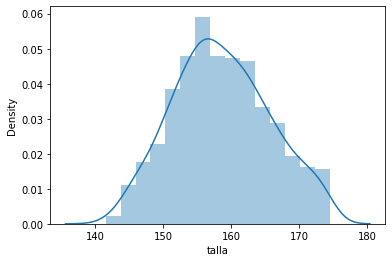

In [ ]:
sns.distplot(df['talla'])

In [ ]:
# Eliminación de outliers de edad:
df = df.query('12<edad')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


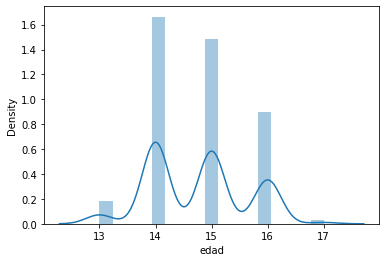

In [ ]:
sns.distplot(df['edad'])

In [ ]:
df = df.query('45<peso_kg<75')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


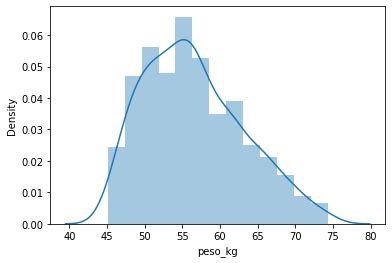

In [ ]:
sns.distplot(df['peso_kg'])

In [ ]:
df = df.query('28<circun_cuello<35')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


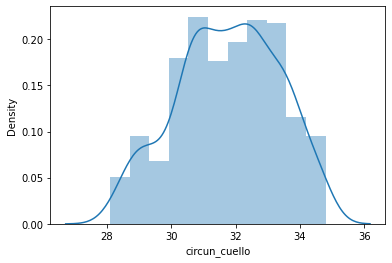

In [ ]:
sns.distplot(df['circun_cuello'])

In [ ]:
df = df.query('19<IMC<27')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


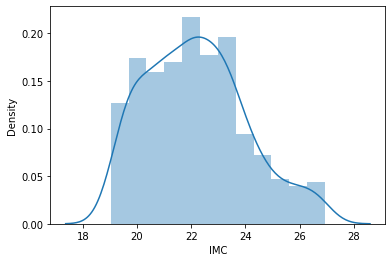

In [ ]:
sns.distplot(df['IMC'])

In [ ]:
df = df.query('65<circun_cintura<92')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


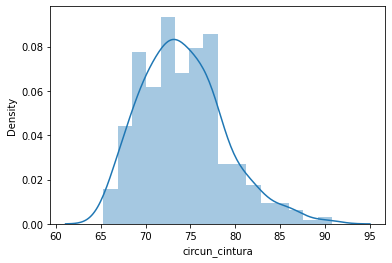

In [ ]:
sns.distplot(df['circun_cintura'])

In [ ]:
df = df.query('75<cadera<102')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


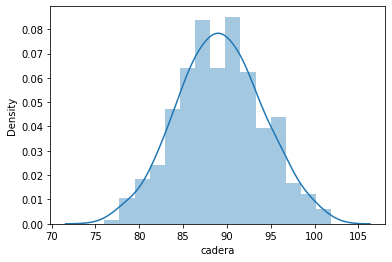

In [ ]:
sns.distplot(df['cadera'])

In [ ]:
df = df.query('0.75<ind_cintura_cadera<0.95')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


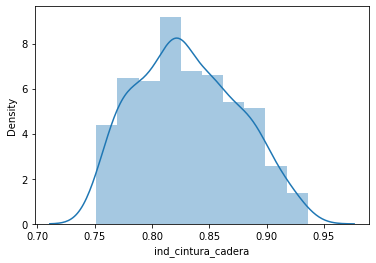

In [ ]:
sns.distplot(df['ind_cintura_cadera'])

In [ ]:
df = df.query('ind_cintura_estatura<60')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


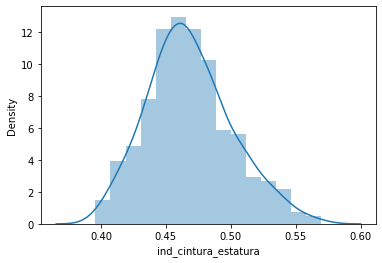

In [ ]:
sns.distplot(df['ind_cintura_estatura'])

In [ ]:
df = df.query('por_grasa_corporal<40')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


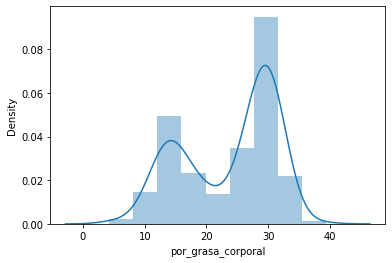

In [ ]:
sns.distplot(df['por_grasa_corporal'])

In [ ]:
df = df.query('masa_corporal_magra_kg<60')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


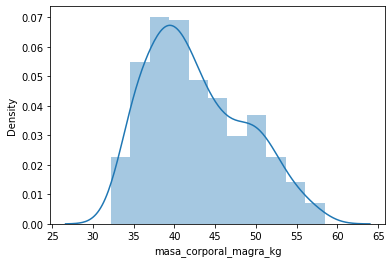

In [ ]:
sns.distplot(df['masa_corporal_magra_kg'])

In [ ]:
df = df.query('pliegue_cutaneo_BICEPS<24')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


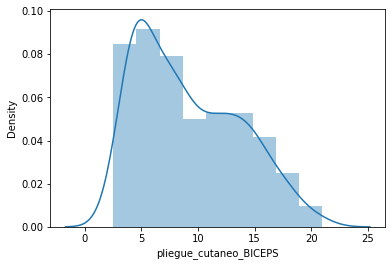

In [ ]:
sns.distplot(df['pliegue_cutaneo_BICEPS'])

In [ ]:
df = df.query('pliegue_cutaneo_TRICEPS<32')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


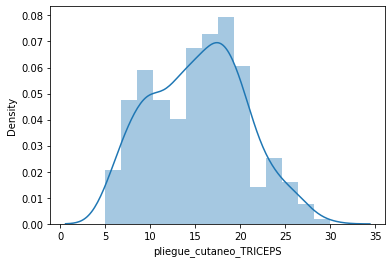

In [ ]:
sns.distplot(df['pliegue_cutaneo_TRICEPS'])

In [ ]:
df = df.query('pliegue_cutaneo_ESCAPULAR<28')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


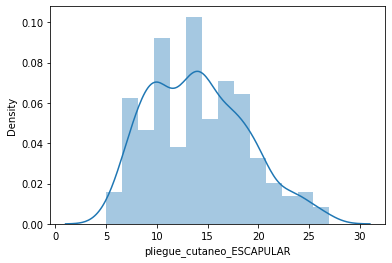

In [ ]:
sns.distplot(df['pliegue_cutaneo_ESCAPULAR'])

In [ ]:
df = df.query('pliegue_cutaneo_SUPRAILIACO<30')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


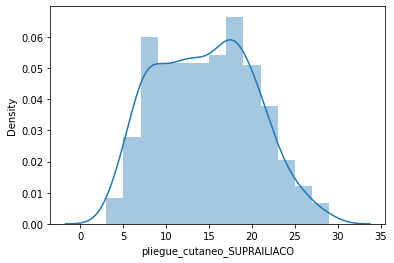

In [ ]:
sns.distplot(df['pliegue_cutaneo_SUPRAILIACO'])

# Tratamiento de datos perdidos

## Identificación de datos nulos

In [ ]:
#msno.matrix(df)

In [ ]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

Empty DataFrame
Columns: [feature, missing_value, percentage]
Index: []

In [ ]:
df.isnull().sum()

Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
dtype: int64

## Imputación paramétrica

**COMENTARIO**: Antes de imputar revisar curtosis en variables con valores nulos

In [ ]:
df1 = df.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


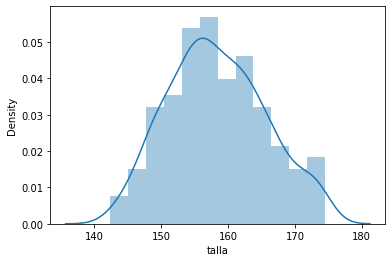

In [ ]:
sns.distplot(df1['talla'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


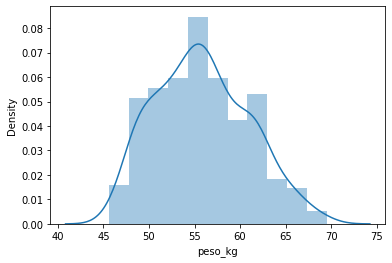

In [ ]:
sns.distplot(df1['peso_kg'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


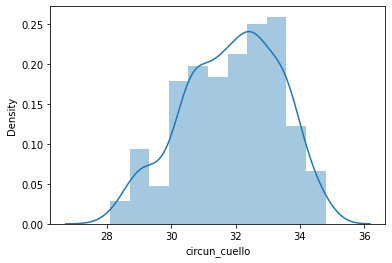

In [ ]:
sns.distplot(df1['circun_cuello'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


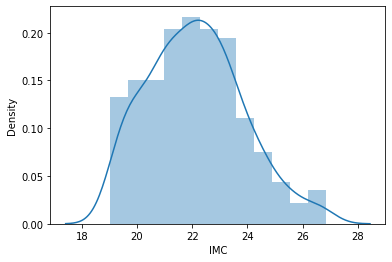

In [ ]:
sns.distplot(df1['IMC'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


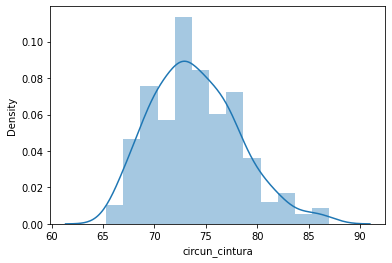

In [ ]:
sns.distplot(df1['circun_cintura'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


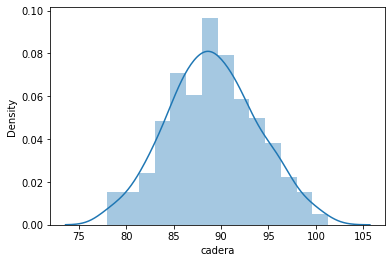

In [ ]:
sns.distplot(df1['cadera'])

**COMENTARIO**: Imputando por la mediana y moda según corresponda


In [ ]:
df1["talla"].fillna(df1["talla"].stats.harmonic_mean(), inplace=True)
df1["edad"].fillna(df1["edad"].mode()[0].round(2), inplace=True)
df1["peso_kg"].fillna(df1["peso_kg"].stats.harmonic_mean().round(2), inplace=True)
df1["circun_cuello"].fillna(df1["circun_cuello"].stats.harmonic_mean().round(2), inplace=True)
df1["IMC"].fillna(df1["IMC"].stats.harmonic_mean().round(2), inplace=True)
df1["circun_cintura"].fillna(df1["circun_cintura"].stats.harmonic_mean().round(2), inplace=True)
# df1["Puntaje_Morosidad2"].fillna(df1["Puntaje_Morosidad2"].mode()[0].round(2), inplace=True)
# df1["Estado_Siniestro"].fillna(df1["Estado_Siniestro"].mode()[0], inplace=True)

Verificamos si aún hay datos perdidos:

In [ ]:
data_missing_value = df1.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

Empty DataFrame
Columns: [feature, missing_value, percentage]
Index: []

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 1 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    348 non-null    object 
 1   talla                        348 non-null    float64
 2   edad                         348 non-null    float64
 3   peso_kg                      348 non-null    float64
 4   circun_cuello                348 non-null    float64
 5   IMC                          348 non-null    float64
 6   circun_cintura               348 non-null    float64
 7   cadera                       348 non-null    float64
 8   ind_cintura_cadera           348 non-null    float64
 9   ind_cintura_estatura         348 non-null    float64
 10  por_grasa_corporal           348 non-null    float64
 11  masa_corporal_magra_kg       348 non-null    float64
 12  pliegue_cutaneo_BICEPS       348 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
numerical_features_imp = df1.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

categorical_features_imp = df1.loc[:, ['Grupos']]

# Codificación

In [ ]:
df1.head()

Individuo  talla  edad  peso_kg  circun_cuello        IMC  \
1    Persona 2  166.5  16.0     61.0           31.8  22.364707   
2    Persona 3  151.3  16.0     49.1           30.5  21.623567   
20  Persona 21  150.9  16.0     54.2           32.5  23.451076   
22  Persona 23  163.1  15.0     62.6           32.6  23.494819   
26  Persona 27  164.2  16.0     66.6           33.6  24.924300   

    circun_cintura  cadera  ind_cintura_cadera  ind_cintura_estatura  \
1             80.9   100.5            0.804975              0.485886   
2             72.0    86.0            0.837209              0.475876   
20            76.2    98.0            0.777551              0.504970   
22            80.2   101.3            0.791708              0.491723   
26            87.0    95.0            0.915789              0.529842   

    por_grasa_corporal  masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
1            28.790714               43.437664                     5.0   
2            29.867419               34.435097                    13.0   
20           28.790714               38.595433                     7.0   
22           30.073493               43.773993                     9.0   
26           30.674761               46.170609                    13.0   

    pliegue_cutaneo_TRICEPS  pliegue_cutaneo_ESCAPULAR  \
1                      19.0                       15.0   
2                      18.0                       18.0   
20                     20.0                       15.0   
22                     20.0                       16.0   
26                     19.0                       20.0   

    pliegue_cutaneo_SUPRAILIACO Grupos  
1                          22.0      A  
2                          17.0      A  
20                         19.0      A  
22                         22.0      A  
26                         18.0      A

In [ ]:
df1['Grupos'] = df1['Grupos'].apply(lambda x: 1 if x=='A' else 0)
df1['Grupos'].head()

1     1
2     1
20    1
22    1
26    1
Name: Grupos, dtype: int64

# Prueba de normalidad

PLATEAMIENTO DE LA HIPOTESIS:

Ho: Los datos están normalmente distribuidos

Ha: Los datos no están normalmente distribuidos

Nivel de significancia: 5% (0.05)

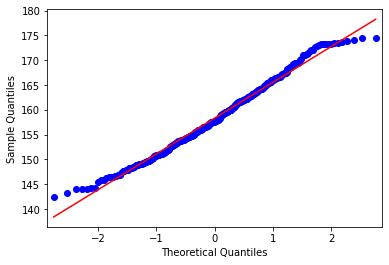

In [ ]:
# Prueba normalidad: talla maxima

qqplot(df1['talla'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


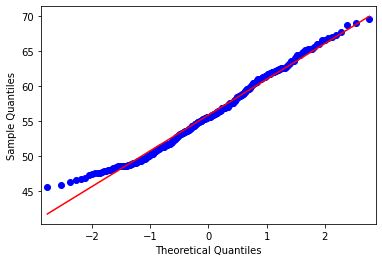

In [ ]:
# Prueba normalidad: peso_kg

qqplot(df1['peso_kg'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


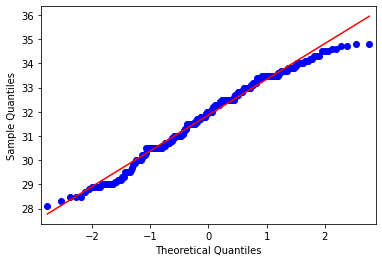

In [ ]:
# Prueba normalidad: circun_cuello

qqplot(df1['circun_cuello'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['circun_cuello'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


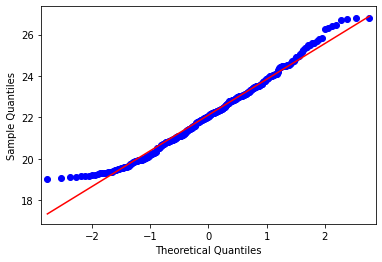

In [ ]:
# Prueba normalidad: IMC

qqplot(df1['IMC'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


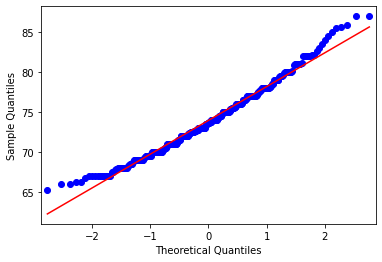

In [ ]:
# Prueba normalidad: circun_cintura

qqplot(df1['circun_cintura'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['circun_cintura'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


# Normalización

In [ ]:
# Realizamos la normalización
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features_norm = scaler.fit_transform(numerical_features_imp)
numerical_features_norm

array([[0.75077882, 0.75      , 0.64435146, ..., 0.56      , 0.45454545,
        0.75      ],
       [0.27725857, 0.75      , 0.14644351, ..., 0.52      , 0.59090909,
        0.54166667],
       [0.26479751, 0.75      , 0.35983264, ..., 0.6       , 0.45454545,
        0.625     ],
       ...,
       [0.05607477, 0.25      , 0.12552301, ..., 0.52      , 0.59090909,
        0.5       ],
       [0.36137072, 0.5       , 0.55648536, ..., 0.28      , 0.40909091,
        0.58333333],
       [0.48598131, 0.25      , 0.50209205, ..., 0.76      , 0.68181818,
        0.83333333]])

In [ ]:
# Convertirmos a DataFrame
numerical_features_norm = pd.DataFrame(
    data=numerical_features_norm,
    columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura',
             'por_grasa_corporal', 'ind_cintura_cadera', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 
             'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
numerical_features_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        348 non-null    float64
 1   edad                         348 non-null    float64
 2   peso_kg                      348 non-null    float64
 3   circun_cuello                348 non-null    float64
 4   IMC                          348 non-null    float64
 5   circun_cintura               348 non-null    float64
 6   cadera                       348 non-null    float64
 7   ind_cintura_cadera           348 non-null    float64
 8   ind_cintura_estatura         348 non-null    float64
 9   por_grasa_corporal           348 non-null    float64
 10  ind_cintura_cadera           348 non-null    float64
 11  pliegue_cutaneo_BICEPS       348 non-null    float64
 12  pliegue_cutaneo_TRICEPS      348 non-null    float64
 13  pliegue_cutaneo_ESCA

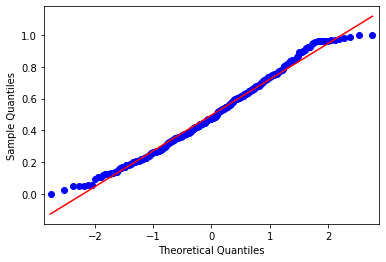

In [ ]:
# Prueba normalidad: talla
qqplot(numerical_features_norm['talla'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_norm['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.520, p-value=0.000


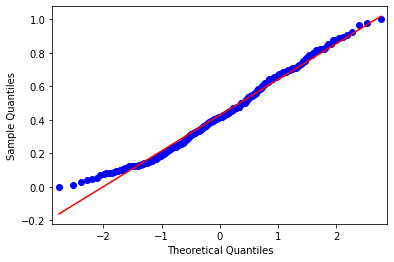

In [ ]:
# Prueba normalidad: peso_kg
qqplot(numerical_features_norm['peso_kg'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_norm['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.511, p-value=0.000


**COMENTARIO**: Aun normalizando los datos se siguen obteniendo una distribución NO normal

# Estandarización

In [ ]:
# Realizamos la estandarización
numerical_features_estand = zscore(numerical_features_imp, axis=0)
numerical_features_estand

array([[ 1.13090152e+00,  1.54611502e+00,  1.01436770e+00, ...,
         7.36752292e-01,  2.37448034e-01,  1.45831601e+00],
       [-9.76035887e-01,  1.54611502e+00, -1.31624677e+00, ...,
         5.32538992e-01,  9.53909732e-01,  4.93131585e-01],
       [-1.03148161e+00,  1.54611502e+00, -3.17411996e-01, ...,
         9.40965591e-01,  2.37448034e-01,  8.79205357e-01],
       ...,
       [-1.96019744e+00, -8.55885100e-01, -1.41417174e+00, ...,
         5.32538992e-01,  9.53909732e-01,  3.00094699e-01],
       [-6.01777268e-01,  3.45114960e-01,  6.03082792e-01, ...,
        -6.92740805e-01, -1.37253199e-03,  6.86168471e-01],
       [-4.73200552e-02, -8.55885100e-01,  3.48477851e-01, ...,
         1.75781879e+00,  1.43155086e+00,  1.84438979e+00]])

In [ ]:
# Convertirmos a DataFrame
numerical_features_estand = pd.DataFrame(
    data=numerical_features_estand,
    columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura',
             'por_grasa_corporal', 'ind_cintura_cadera', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 
             'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
numerical_features_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        348 non-null    float64
 1   edad                         348 non-null    float64
 2   peso_kg                      348 non-null    float64
 3   circun_cuello                348 non-null    float64
 4   IMC                          348 non-null    float64
 5   circun_cintura               348 non-null    float64
 6   cadera                       348 non-null    float64
 7   ind_cintura_cadera           348 non-null    float64
 8   ind_cintura_estatura         348 non-null    float64
 9   por_grasa_corporal           348 non-null    float64
 10  ind_cintura_cadera           348 non-null    float64
 11  pliegue_cutaneo_BICEPS       348 non-null    float64
 12  pliegue_cutaneo_TRICEPS      348 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
numerical_features_estand.isnull().sum()

talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
ind_cintura_cadera             0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
dtype: int64

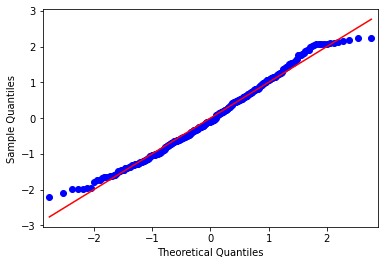

In [ ]:
# Prueba normalidad: talla
qqplot(numerical_features_estand['talla'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_estand['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.045, p-value=0.476


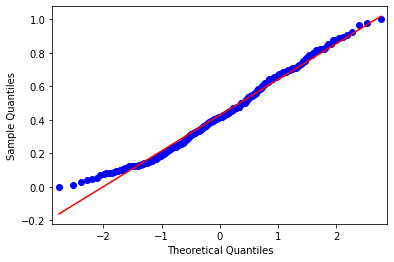

In [ ]:
# Prueba normalidad: peso_kg
qqplot(numerical_features_norm['peso_kg'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_estand['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.046, p-value=0.447


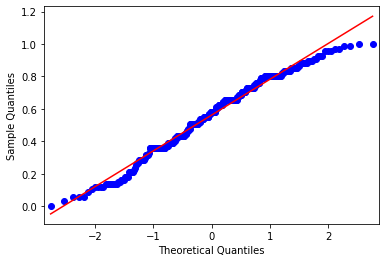

In [ ]:
# Prueba normalidad: circun_cuello
qqplot(numerical_features_norm['circun_cuello'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_estand['circun_cuello'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.077, p-value=0.031


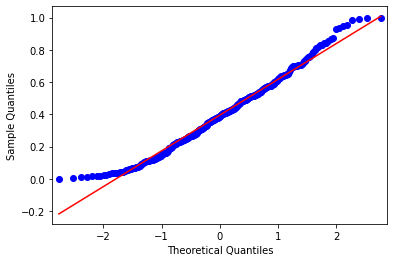

In [ ]:
# Prueba normalidad: IMC
qqplot(numerical_features_norm['IMC'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_estand['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.038, p-value=0.701


# Normalización con SKLEARN

In [ ]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
numerical_features_skler = skler.fit_transform(numerical_features_imp)
numerical_features_skler

array([[ 1.13090152e+00,  1.54611502e+00,  1.01436770e+00, ...,
         7.36752292e-01,  2.37448034e-01,  1.45831601e+00],
       [-9.76035887e-01,  1.54611502e+00, -1.31624677e+00, ...,
         5.32538992e-01,  9.53909732e-01,  4.93131585e-01],
       [-1.03148161e+00,  1.54611502e+00, -3.17411996e-01, ...,
         9.40965591e-01,  2.37448034e-01,  8.79205357e-01],
       ...,
       [-1.96019744e+00, -8.55885100e-01, -1.41417174e+00, ...,
         5.32538992e-01,  9.53909732e-01,  3.00094699e-01],
       [-6.01777268e-01,  3.45114960e-01,  6.03082792e-01, ...,
        -6.92740805e-01, -1.37253199e-03,  6.86168471e-01],
       [-4.73200552e-02, -8.55885100e-01,  3.48477851e-01, ...,
         1.75781879e+00,  1.43155086e+00,  1.84438979e+00]])

In [ ]:
numerical_features_skler = pd.DataFrame(
    data=numerical_features_skler,
    columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura',
             'por_grasa_corporal', 'ind_cintura_cadera', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 
             'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
numerical_features_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        348 non-null    float64
 1   edad                         348 non-null    float64
 2   peso_kg                      348 non-null    float64
 3   circun_cuello                348 non-null    float64
 4   IMC                          348 non-null    float64
 5   circun_cintura               348 non-null    float64
 6   cadera                       348 non-null    float64
 7   ind_cintura_cadera           348 non-null    float64
 8   ind_cintura_estatura         348 non-null    float64
 9   por_grasa_corporal           348 non-null    float64
 10  ind_cintura_cadera           348 non-null    float64
 11  pliegue_cutaneo_BICEPS       348 non-null    float64
 12  pliegue_cutaneo_TRICEPS      348 non-null    float64
 13  pliegue_cutaneo_ESCA

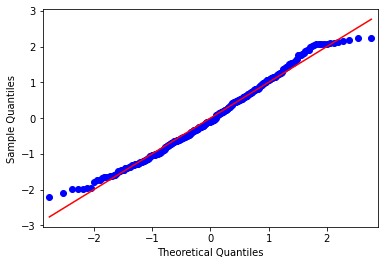

In [ ]:
# Prueba normalidad: talla
qqplot(numerical_features_skler['talla'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_skler['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.045, p-value=0.476


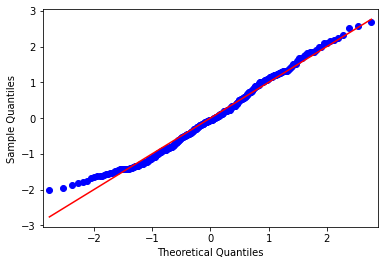

In [ ]:
# Prueba normalidad: peso_kg
qqplot(numerical_features_skler['peso_kg'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_skler['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.046, p-value=0.447


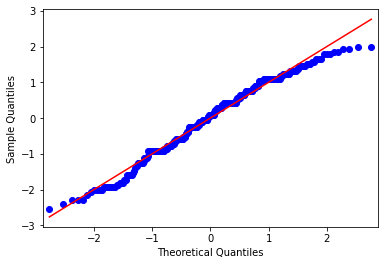

In [ ]:
# Prueba normalidad: circun_cuello
qqplot(numerical_features_skler['circun_cuello'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_skler['circun_cuello'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.077, p-value=0.031


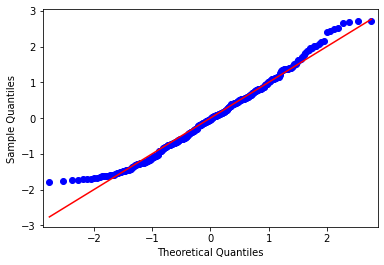

In [ ]:
# Prueba normalidad: IMC
qqplot(numerical_features_skler['IMC'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(numerical_features_skler['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.038, p-value=0.701


**COMENTARIO**: Hemos forzado con diferentes técnicas y se ha obtenido una distribución normal.

# Correlaciones

Planteamiento de hipótesis:

Ho: No existe correlacion entre las variables A y B.

Ha: Existe correlacion entre las variables A y B.

Nivel de significancia = 5%  (0.05)

## Prueba de correlación Paramétrica

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


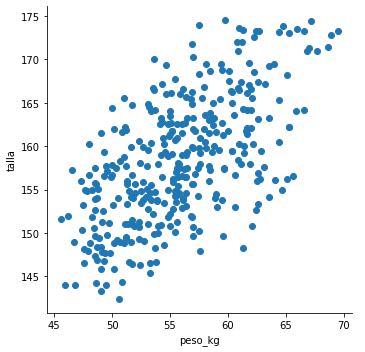

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(df1, size=5).map(plt.scatter, "peso_kg", "talla").add_legend() # Ingresar VARIABLE DEPENDIENTE E INDEPENDIENTE

In [ ]:
# # Gráfico distribución de las variables

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# axs[0].hist(x=dat.aleatorioX, bins=20, color="#3182bd", alpha=0.5)
# axs[0].plot(dat.aleatorioX, np.full_like(dat.aleatorioX, -0.01), '|k', markeredgewidth=1)
# axs[0].set_title('Distribución aleatorioX')
# axs[0].set_xlabel('aleatorioX')
# axs[0].set_ylabel('counts')

# axs[1].hist(x=dat.aleatorioY, bins=20, color="#3182bd", alpha=0.5)
# axs[1].plot(dat.aleatorioY, np.full_like(dat.aleatorioY, -0.01), '|k', markeredgewidth=1)
# axs[1].set_title('Distribución aleatorioY')
# axs[1].set_xlabel('aleatorioY')
# axs[1].set_ylabel('counts')


# plt.tight_layout();

In [ ]:
# Correlación r de pearson
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(df1['talla'], df1['peso_kg'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=0.619, p-value=0.000


## Prueba de correlación No Paramétrica

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


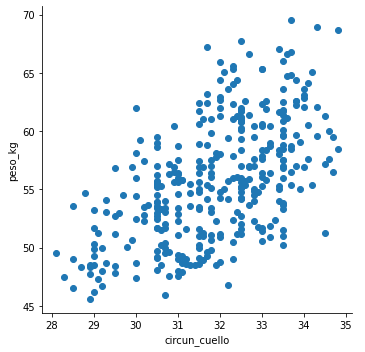

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(numerical_features_imp, size=5).map(plt.scatter, "circun_cuello", "peso_kg").add_legend() # Ingresar VARIABLE DEPENDIENTE E INDEPENDIENTE

In [ ]:
# # Gráfico distribución de las variables

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# axs[0].hist(x=data_riesgo_num2.edad, bins=20, color="#3182bd", alpha=0.5)
# axs[0].plot(data_riesgo_num2.edad, np.full_like(data_riesgo_num2.edad, -0.01), '|k', markeredgewidth=1)
# axs[0].set_title('Distribución Edad')
# axs[0].set_xlabel('Edad')
# axs[0].set_ylabel('counts')

# axs[1].hist(x=data_riesgo_num2.score, bins=20, color="#3182bd", alpha=0.5)
# axs[1].plot(data_riesgo_num2.score, np.full_like(data_riesgo_num2.score, -0.01), '|k', markeredgewidth=1)
# axs[1].set_title('Distribución Score')
# axs[1].set_xlabel('Score')
# axs[1].set_ylabel('counts')


# plt.tight_layout();

In [ ]:
# Correlación spearmanr
#from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(numerical_features_imp['talla'], numerical_features_imp['peso_kg'])

print('Correlación Spearman=%.3f, p-value=%.3f' % (rho, p))

Correlación Spearman=0.595, p-value=0.000


**Conclusión**: Con un nivel de significancia del 5% se afirma que, la edad y el score son mutuamente dependientes, con una correlación de rho = 0.416.

# Análisis Bivariado (post tratamiento)

## Variables numéricas

#### Variable dependiente con Independiente

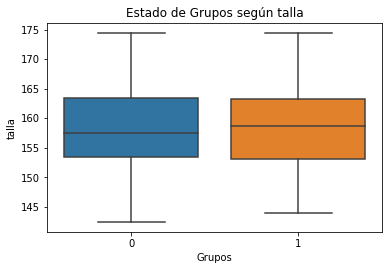

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.boxplot(
        x     = 'Grupos',  # variable cualitativa
        y     = 'talla',  # variable cuantitativa
        data  = df1,   # dataframe
        ax    = ax
    )

ax.set_title('Estado de Grupos según talla');

In [ ]:
# antiguedad_siniestro = pd.crosstab(df1['Grupos'], df1['Talla']) 
# antiguedad_siniestro

#### Gráfico de Dispersión

<Figure size 432x288 with 0 Axes>

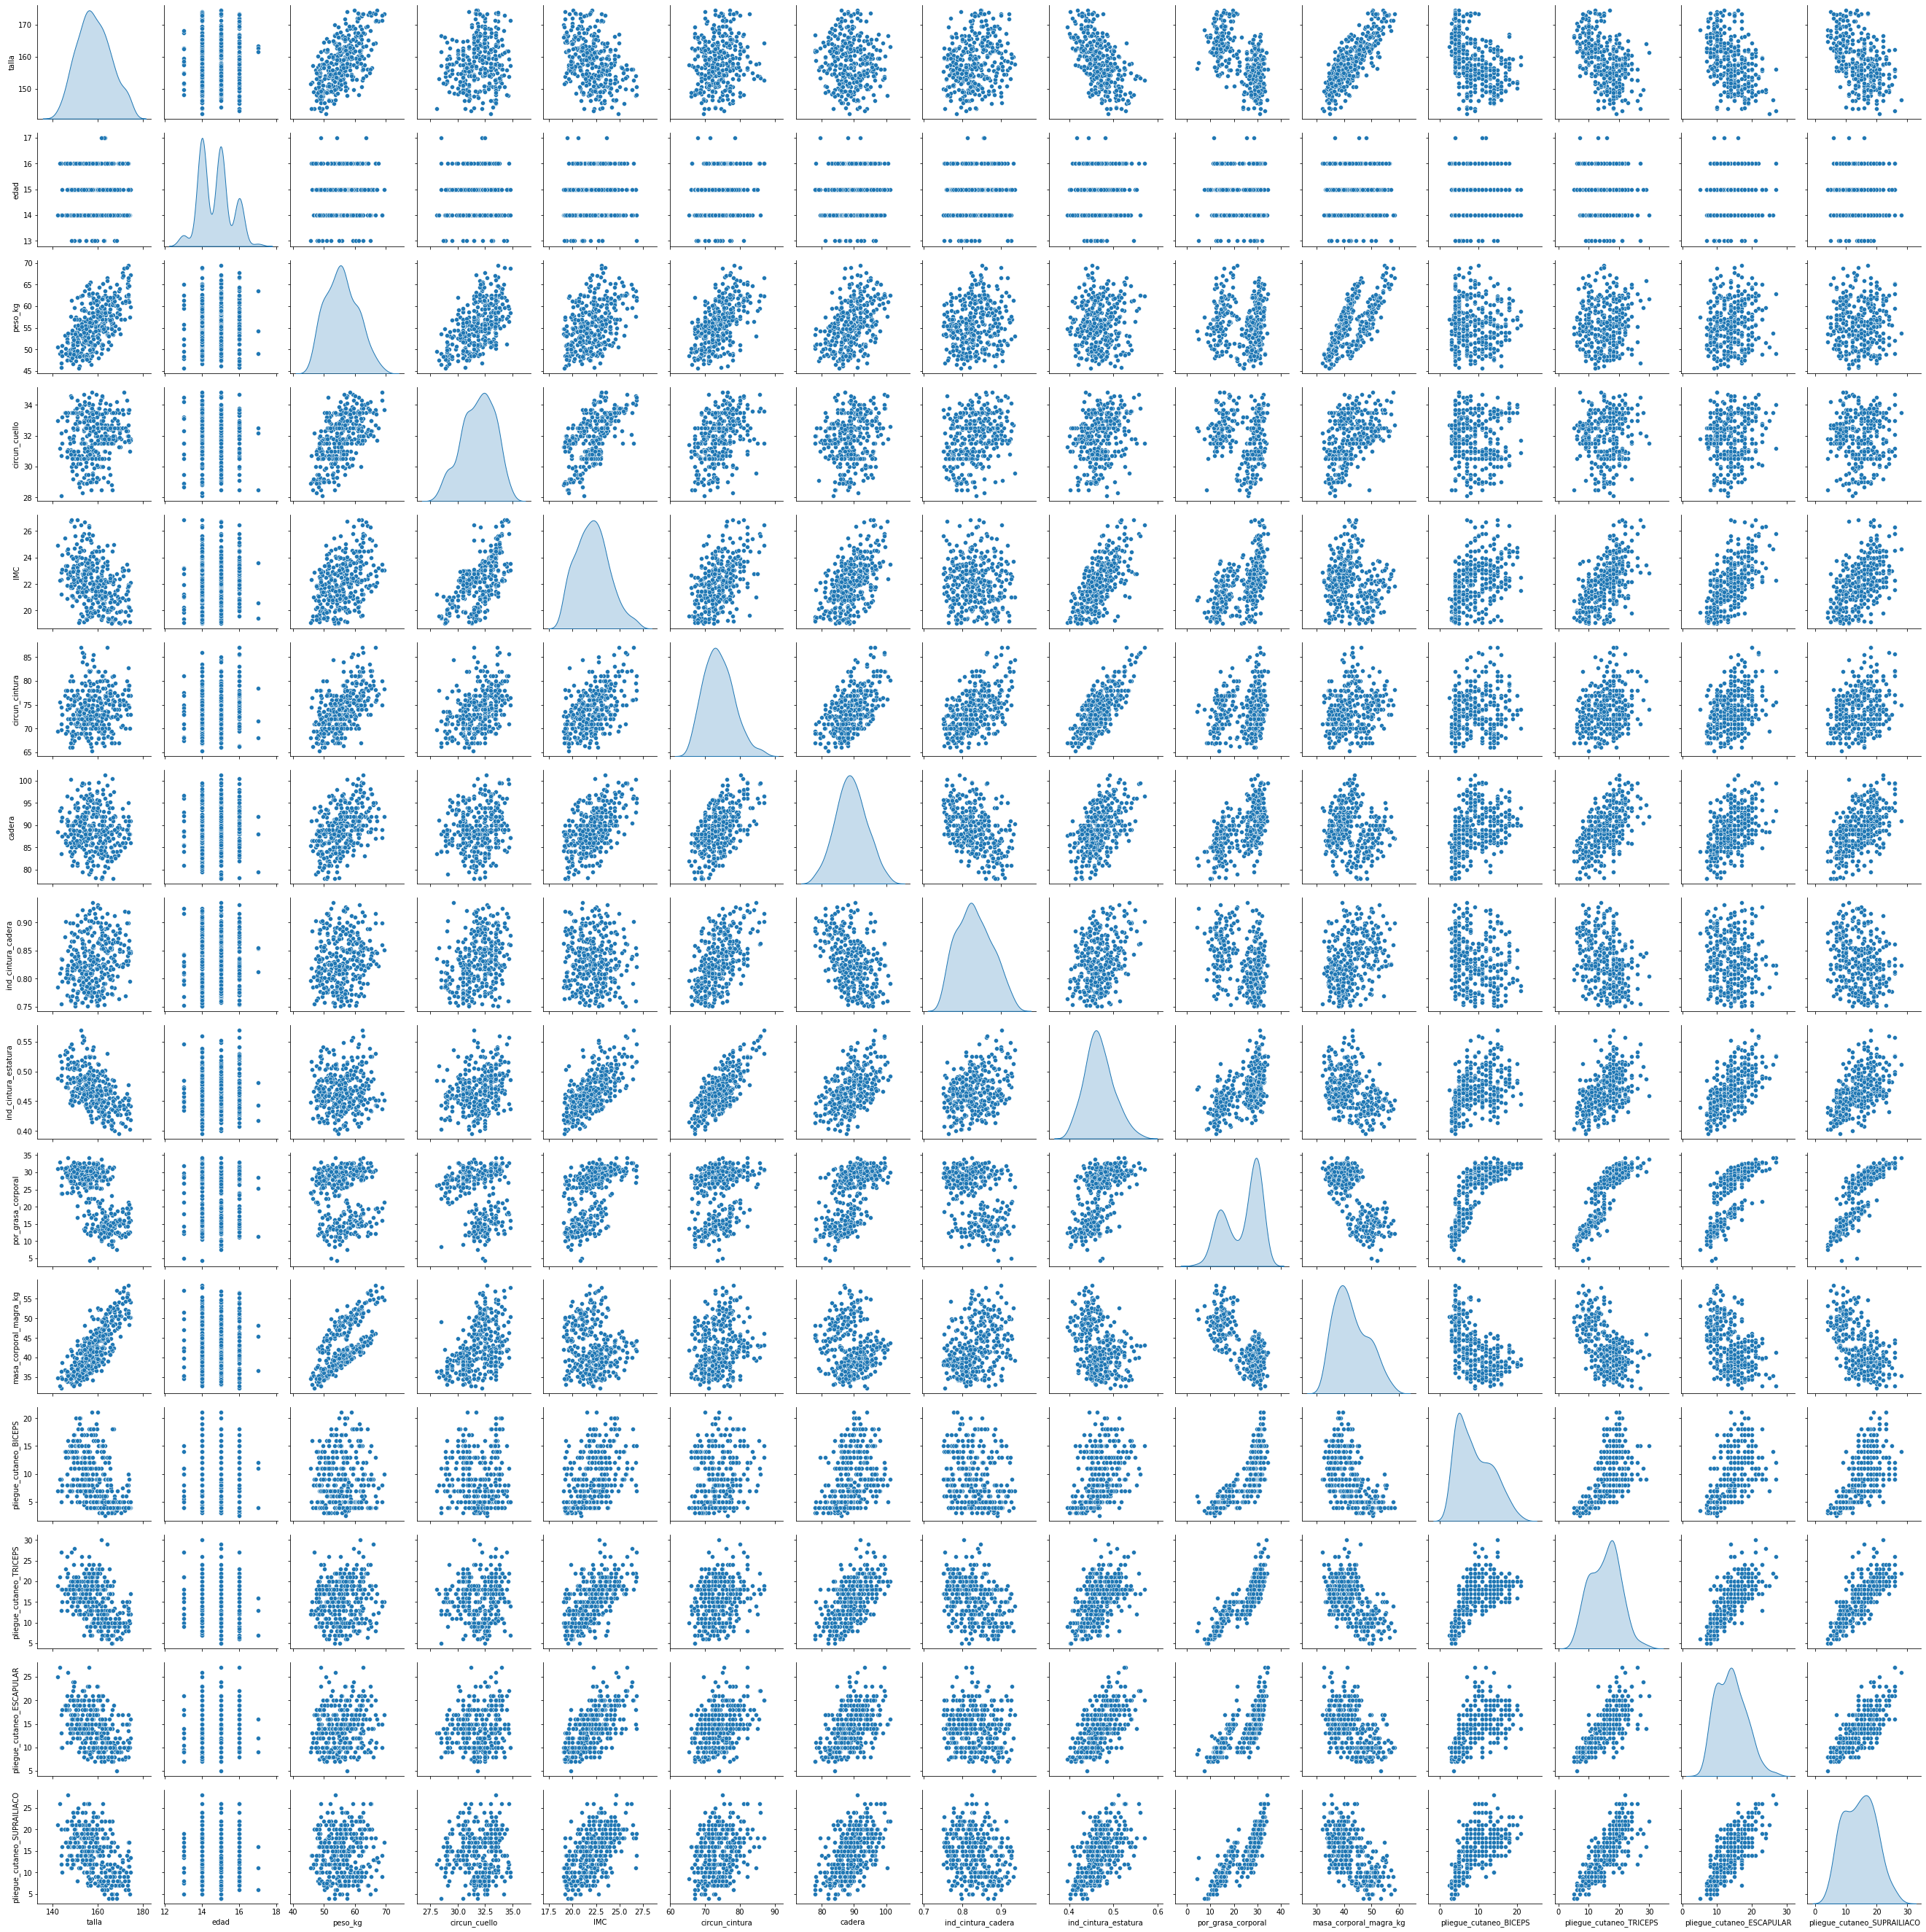

In [ ]:
plt.figure(figsize=(6,4))

sns.pairplot(numerical_features_imp, diag_kind='kde');

In [ ]:
# import plotly.express as px

# for i in numerical_features_imp:
  # fig = px.scatter(df1, x='xxxxxxx', y='xxxxx', color='xxxxxxxxx', size='xxxxxxxxxxxxxx',
  #               facet_col='xxxxxxxxx', facet_col_wrap=4)
  # fig.show()

#### Correlación

NOTA: Antes de la correlación debe ir una prueba de normalidad para ver si usamos la corr de person o la rho de spearman. Si tiene distribución normal: person - no: spearman. Person: relación causa efecto - Spearman: no relación.

In [ ]:
numerical_features_skler.corr(method='pearson')

talla      edad   peso_kg  circun_cuello  \
talla                        1.000000  0.053262  0.618949       0.151846   
edad                         0.053262  1.000000  0.076492       0.038317   
peso_kg                      0.618949  0.076492  1.000000       0.567354   
circun_cuello                0.151846  0.038317  0.567354       1.000000   
IMC                         -0.371413  0.112257  0.427722       0.603729   
circun_cintura               0.118290  0.099323  0.551398       0.440099   
cadera                      -0.067626  0.062905  0.435164       0.177361   
ind_cintura_cadera           0.196678  0.043466  0.155382       0.302184   
ind_cintura_estatura        -0.559950  0.049409  0.050687       0.271266   
por_grasa_corporal          -0.598990  0.012148 -0.077444      -0.135388   
ind_cintura_cadera           0.829584  0.045787  0.708315       0.461883   
pliegue_cutaneo_BICEPS      -0.440878 -0.062836 -0.021141      -0.043481   
pliegue_cutaneo_TRICEPS     -0.478000 -0.049881  0.049606       0.033364   
pliegue_cutaneo_ESCAPULAR   -0.445032  0.054047  0.095409       0.151220   
pliegue_cutaneo_SUPRAILIACO -0.464400 -0.013963  0.033677       0.021264   

                                  IMC  circun_cintura    cadera  \
talla                       -0.371413        0.118290 -0.067626   
edad                         0.112257        0.099323  0.062905   
peso_kg                      0.427722        0.551398  0.435164   
circun_cuello                0.603729        0.440099  0.177361   
IMC                          1.000000        0.510539  0.574460   
circun_cintura               0.510539        1.000000  0.545073   
cadera                       0.574460        0.545073  1.000000   
ind_cintura_cadera          -0.027166        0.532031 -0.418547   
ind_cintura_estatura         0.669956        0.755386  0.496933   
por_grasa_corporal           0.562322        0.202718  0.568257   
ind_cintura_cadera          -0.122273        0.213622 -0.117368   
pliegue_cutaneo_BICEPS       0.449193        0.144839  0.364303   
pliegue_cutaneo_TRICEPS      0.593097        0.232623  0.585664   
pliegue_cutaneo_ESCAPULAR    0.627384        0.385812  0.483876   
pliegue_cutaneo_SUPRAILIACO  0.545490        0.283251  0.528684   

                             ind_cintura_cadera  ind_cintura_estatura  \
talla                                  0.196678             -0.559950   
edad                                   0.043466              0.049409   
peso_kg                                0.155382              0.050687   
circun_cuello                          0.302184              0.271266   
IMC                                   -0.027166              0.669956   
circun_cintura                         0.532031              0.755386   
cadera                                -0.418547              0.496933   
ind_cintura_cadera                     1.000000              0.315451   
ind_cintura_estatura                   0.315451              1.000000   
por_grasa_corporal                    -0.360719              0.557578   
ind_cintura_cadera                     0.352443             -0.364380   
pliegue_cutaneo_BICEPS                -0.220263              0.405264   
pliegue_cutaneo_TRICEPS               -0.339168              0.504330   
pliegue_cutaneo_ESCAPULAR             -0.075398              0.614287   
pliegue_cutaneo_SUPRAILIACO           -0.230385              0.536187   

                             por_grasa_corporal  ind_cintura_cadera  \
talla                                 -0.598990            0.829584   
edad                                   0.012148            0.045787   
peso_kg                               -0.077444            0.708315   
circun_cuello                         -0.135388            0.461883   
IMC                                    0.562322           -0.122273   
circun_cintura                         0.202718            0.213622   
cadera                                 0.568257           -0.117368   
ind_c

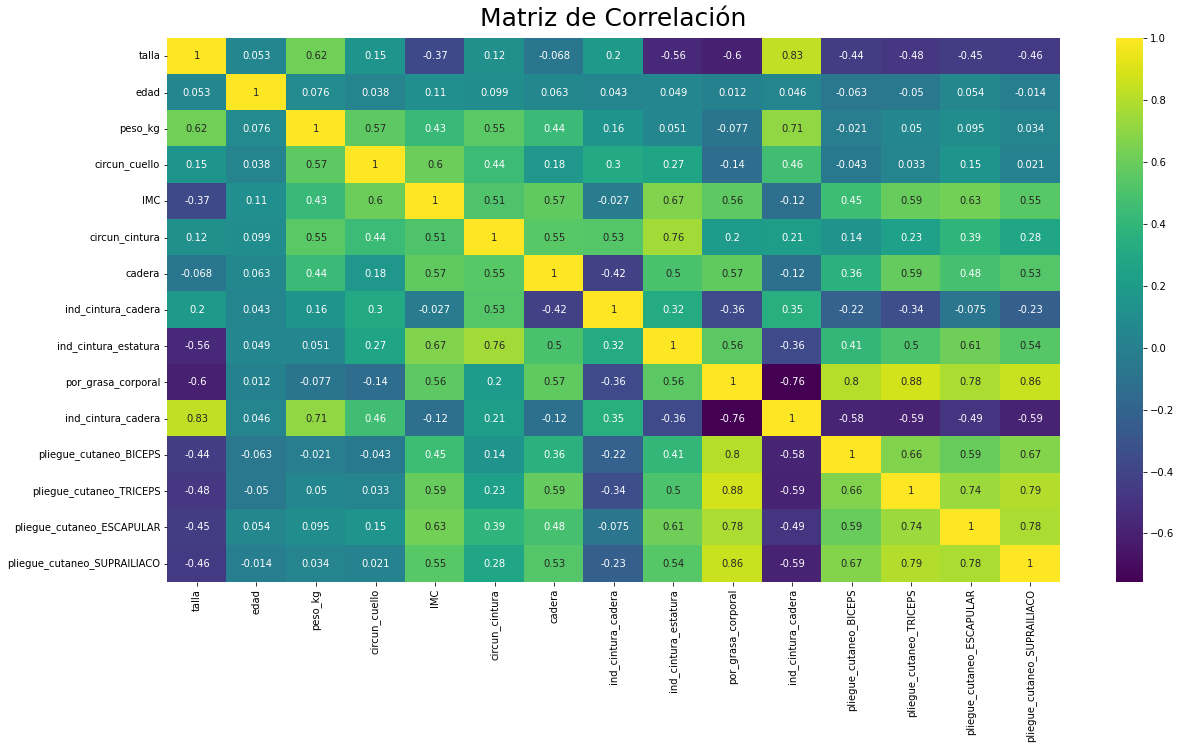

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(numerical_features_skler.corr(method='pearson'),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

# Análisis Multivariado (post tratamiento)

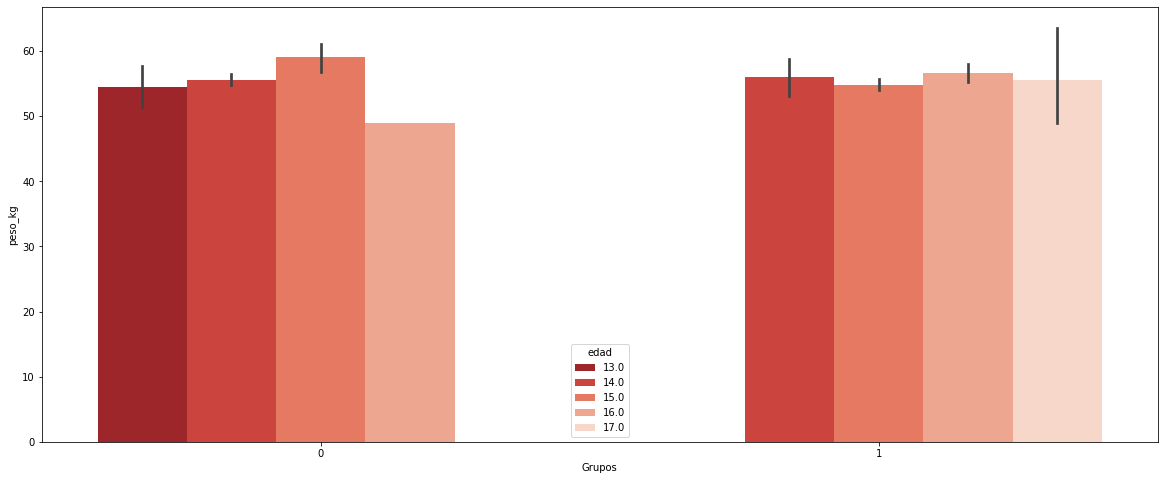

In [ ]:
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.barplot(x = 'Grupos', y = 'peso_kg',   # x: cualitativa - y: cuantitativa
                 hue='edad', data=df1, palette='Reds_r') # hue: colores - cualitativa

# Características y etiquetas

**COMENTARIO**: Se trata de dividir los variable dependiente e independientes

In [ ]:
X = df1.drop(['Grupos'], axis=1) # Variables independientes
y = df1['Grupos']            # Variable dependiente

In [ ]:
X.head(3)

In [ ]:
y.head(3)

# Divisón de Prueba y Entrenaiento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print("Datos originales: ", X.shape)
print("Datos para el entrenamiento: ",X_train.shape)
print("Datos para prueba",X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalamiento

## RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)